1957    3491.000000
1958    3740.330000
1959    3688.461000
1960    3600.986840
1961    3511.093282
1962    3422.882216
1963    3336.817057
1964    3252.907132
1965    3171.106165
1966    3091.362111
1967    3013.623370
1968    2937.839529
1969    2863.961431
1970    2791.941152
1971    2721.731972
1972    2653.288349
1973    2586.565883
1974    2521.521293
1975    2458.112385
1976    2396.298025
1977    2336.038117
1978    2277.293569
1979    2220.026276
1980    2164.199088
1981    2109.775791
1982    2056.721082
1983    2005.000543
1984    1954.580626
1985    1905.428622
1986    1857.512648
           ...     
2072     207.823162
2073     202.597015
2074     197.502291
2075     192.535684
2076     187.693973
2077     182.974017
2078     178.372754
2079     173.887199
2080     169.514443
2081     165.251649
2082     161.096052
2083     157.044956
2084     153.095733
2085     149.245822
2086     145.492725
2087     141.834007
2088     138.267295
2089     134.790276
2090     131.400693


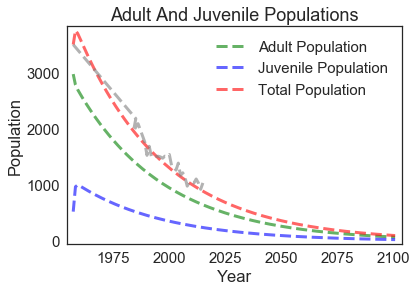

In [2]:
%matplotlib inline

from modsim import *

population_table = System(Year = [1957, 1985, 1984, 1986, 1989, 1990, 1991, 1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
                             2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           Population = [3491, 2176, 1961, 2087, 1761, 1524, 1685, 1495, 1508, 1496, 1473, 1509, 1503, 1539, 1343, 1308,
                          1261, 1386, 1166, 1214, 1132, 977, 1049, 1044, 1032, 1104, 1033, 920, 1034])


SealPop = System(n0 = 1957, nf = 2100, p0_adult = 2967, p0_juvenile = 524, birth_rate = 0.29, death_rate_adult = 0.1, death_rate_juvenile = 0.8, mature_rate = 0.2)

def simadults(system):
    adults = TimeSeries()
    adults[system.n0] = system.p0_adult
    
    juveniles = TimeSeries()
    juveniles[system.n0] = system.p0_juvenile
    
    for t in linrange(system.n0, system.nf):
        births = adults[t]*system.birth_rate
        deaths_adult = adults[t]*system.death_rate_adult
        deaths_juvenile = juveniles[t]*system.death_rate_juvenile
        matured = juveniles[t]*system.mature_rate
        
        juveniles[t+1] = juveniles[t] + births - deaths_juvenile
        adults[t+1] = adults[t] + matured - deaths_adult
        
        
    system.adults = adults
    system.juveniles = juveniles
    return system.adults

def simjuveniles(system):
    adults = TimeSeries()
    adults[system.n0] = system.p0_adult
    
    juveniles = TimeSeries()
    juveniles[system.n0] = system.p0_juvenile
    
    for t in linrange(system.n0, system.nf):
        births = adults[t]*system.birth_rate
        deaths_adult = adults[t]*system.death_rate_adult
        deaths_juvenile = juveniles[t]*system.death_rate_juvenile
        matured = juveniles[t]*system.mature_rate
        
        juveniles[t+1] = juveniles[t] + births - deaths_juvenile
        adults[t+1] = adults[t] + matured - deaths_adult
        
    system.juveniles = juveniles
    return system.juveniles

def simulation(system):
    adults = TimeSeries()
    adults[system.n0] = system.p0_adult
    
    juveniles = TimeSeries()
    juveniles[system.n0] = system.p0_juvenile
    
    for t in linrange(system.n0, system.nf):
        births = adults[t]*system.birth_rate
        deaths_adult = adults[t]*system.death_rate_adult
        deaths_juvenile = juveniles[t]*system.death_rate_juvenile
        matured = juveniles[t]*system.mature_rate
        
        juveniles[t+1] = juveniles[t] + births - deaths_juvenile
        adults[t+1] = adults[t] + matured - deaths_adult
        
        
    system.adults = adults
    system.juveniles = juveniles
    return system.adults + system.juveniles

simulation(SealPop)
simadults(SealPop)
simjuveniles(SealPop)

population = simulation(SealPop)
adults = simadults(SealPop)
juveniles = simjuveniles(SealPop)

plot(adults, '--', color='green', label = 'Adult Population')
plot(juveniles, '--', color='blue', label = 'Juvenile Population')
plot(population, '--', color='red',label = 'Total Population')
plot(population_table.Year, population_table.Population, '--', color='grey')
decorate(xlabel = 'Year', ylabel = 'Population', title = 'Adult And Juvenile Populations')

print(population)


        
